# Something

<IPython.core.display.Javascript object>


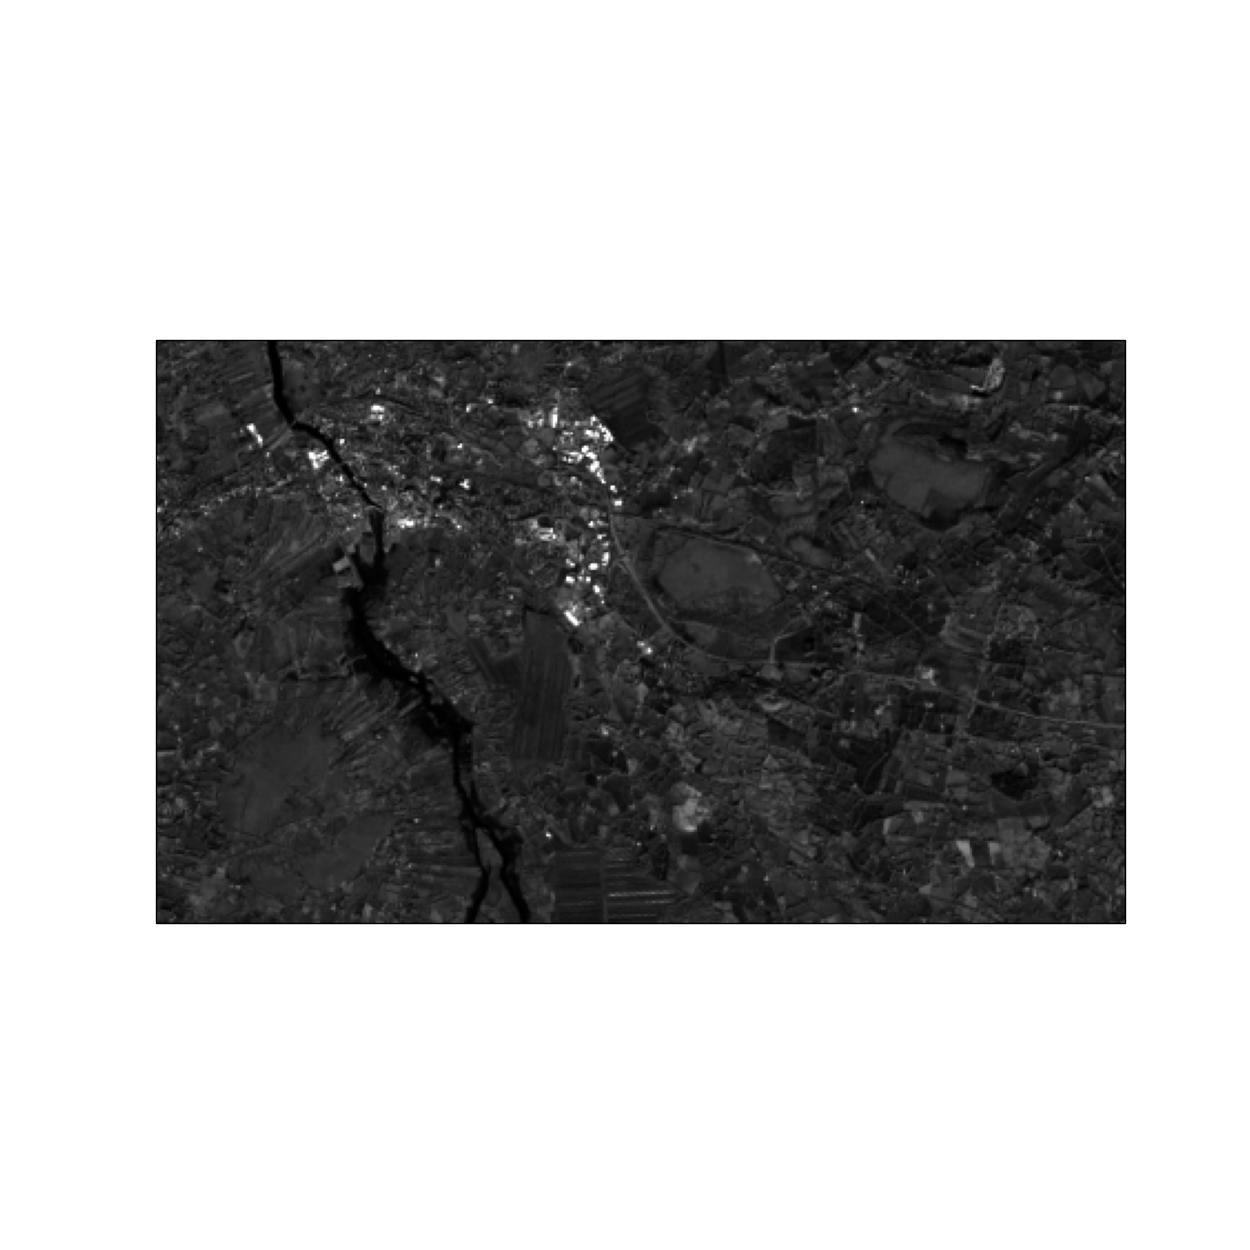

<IPython.core.display.Javascript object>


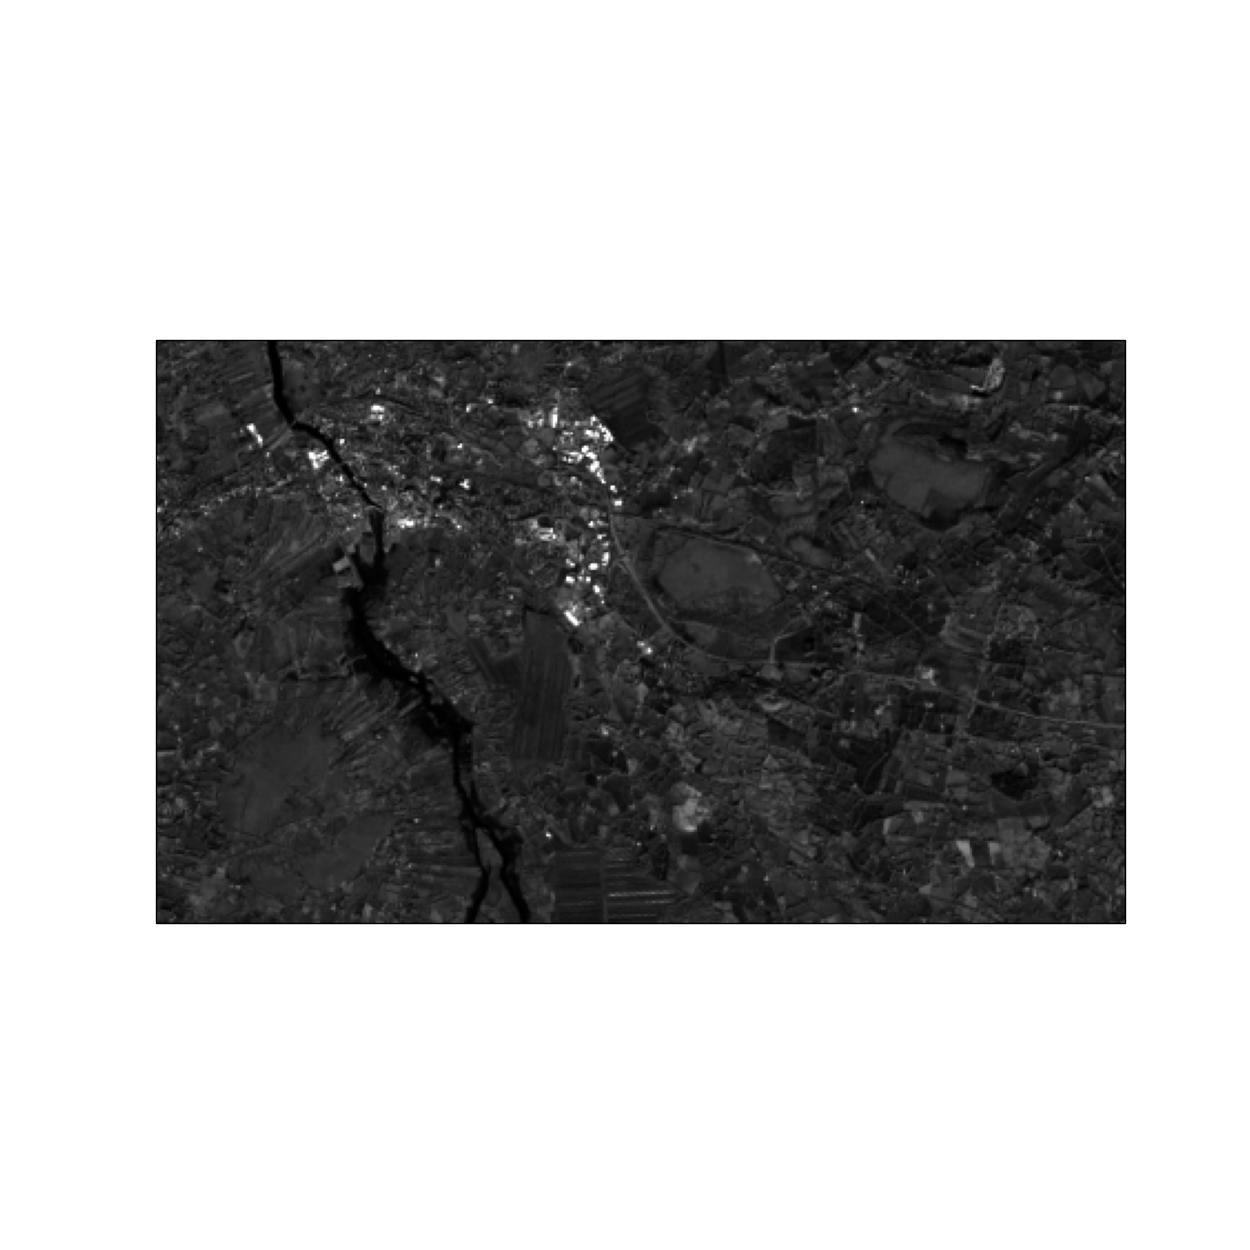

In [129]:
###This is a script designed to take an image from the Landsat 8 collection and run an NDVI on it. 
###To start, head over to the USGS portal and pick your Landsat 8 image, and download it. Make sure you have the seperate bands!



%matplotlib notebook

import numpy as np
import rasterio as rio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import fiona as fi
import earthpy as es
import earthpy.spatial as es
import earthpy.plot as ep
import landsatxplore as lsex

###Open your image and check the CRS to ensure it is in the desired projection
with rio.open('Image/full_image_test-msi_chip.img') as dataset:
    img = dataset.read()
    xmin, ymin, xmax, ymax = dataset.bounds


###Create a an axis for plotting. 
plotCRS = ccrs.UTM(29) # make sure that this UTM(x) corresponds to the CRS printed above
fig, ax = plt.subplots(1, 1, figsize = (10, 10), subplot_kw=dict(projection=plotCRS)) #HUGH CHANGE SOME PARAMETERS DON'T JUST COPY

#and plot
ax.imshow(img[0], cmap='gray', vmin=200, vmax=500, transform = plotCRS, extent = [xmin, xmax, ymin, ymax])


def img_display(image, ax, bands, transform, extent):
    '''
    This is where you should write a docstring.
    '''
    # first, we transpose the image to re-order the indices
    dispimg = image.transpose([1, 2, 0])

    # next, we have to scale the image.
    dispimg = dispimg / dispimg.max()

    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)

    return handle, ax

h, ax = img_display(img, ax, [2, 1, 0], plotCRS, [xmin, xmax, ymin, ymax])
fig # just to save you from scrolling back up to see


In [130]:
maxvals = [img[i].max() for i in range(dataset.count)]
print(maxvals)

[9872, 10055, 9757, 10360, 14231, 12904, 11844]


In [131]:
def percentile_stretch(image, pmin=0., pmax=100.):
    '''
    This is where you should write a docstring.
    '''
    # here, we make sure that pmin < pmax, and that they are between 0, 100
    if not 0 <= pmin < pmax <= 100:
        raise ValueError('0 <= pmin < pmax <= 100')
    # here, we make sure that the image is only 2-dimensional
    if not image.ndim == 2:
        raise ValueError('Image can only have two dimensions (row, column)')

    minval = np.percentile(image, pmin)
    maxval = np.percentile(image, pmax)

    stretched = (image - minval) / (maxval - minval) # stretch the image to 0, 1
    stretched[image < minval] = 0 # set anything less than minval to the new minimum, 0.
    stretched[image > maxval] = 1 # set anything greater than maxval to the new maximum, 1.

    return stretched

In [132]:
def img_display(image, ax, bands, transform, extent, pmin=0, pmax=100):
    '''
    This is where you should write a docstring.
    '''
    dispimg = image.copy().astype(np.float32) # make a copy of the original image,
    # but be sure to cast it as a floating-point image, rather than an integer

    for b in range(image.shape[0]): # loop over each band, stretching using percentile_stretch()
        dispimg[b] = percentile_stretch(image[b], pmin=pmin, pmax=pmax)

    # next, we transpose the image to re-order the indices
    dispimg = dispimg.transpose([1, 2, 0])

    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)

    return handle, ax

<IPython.core.display.Javascript object>


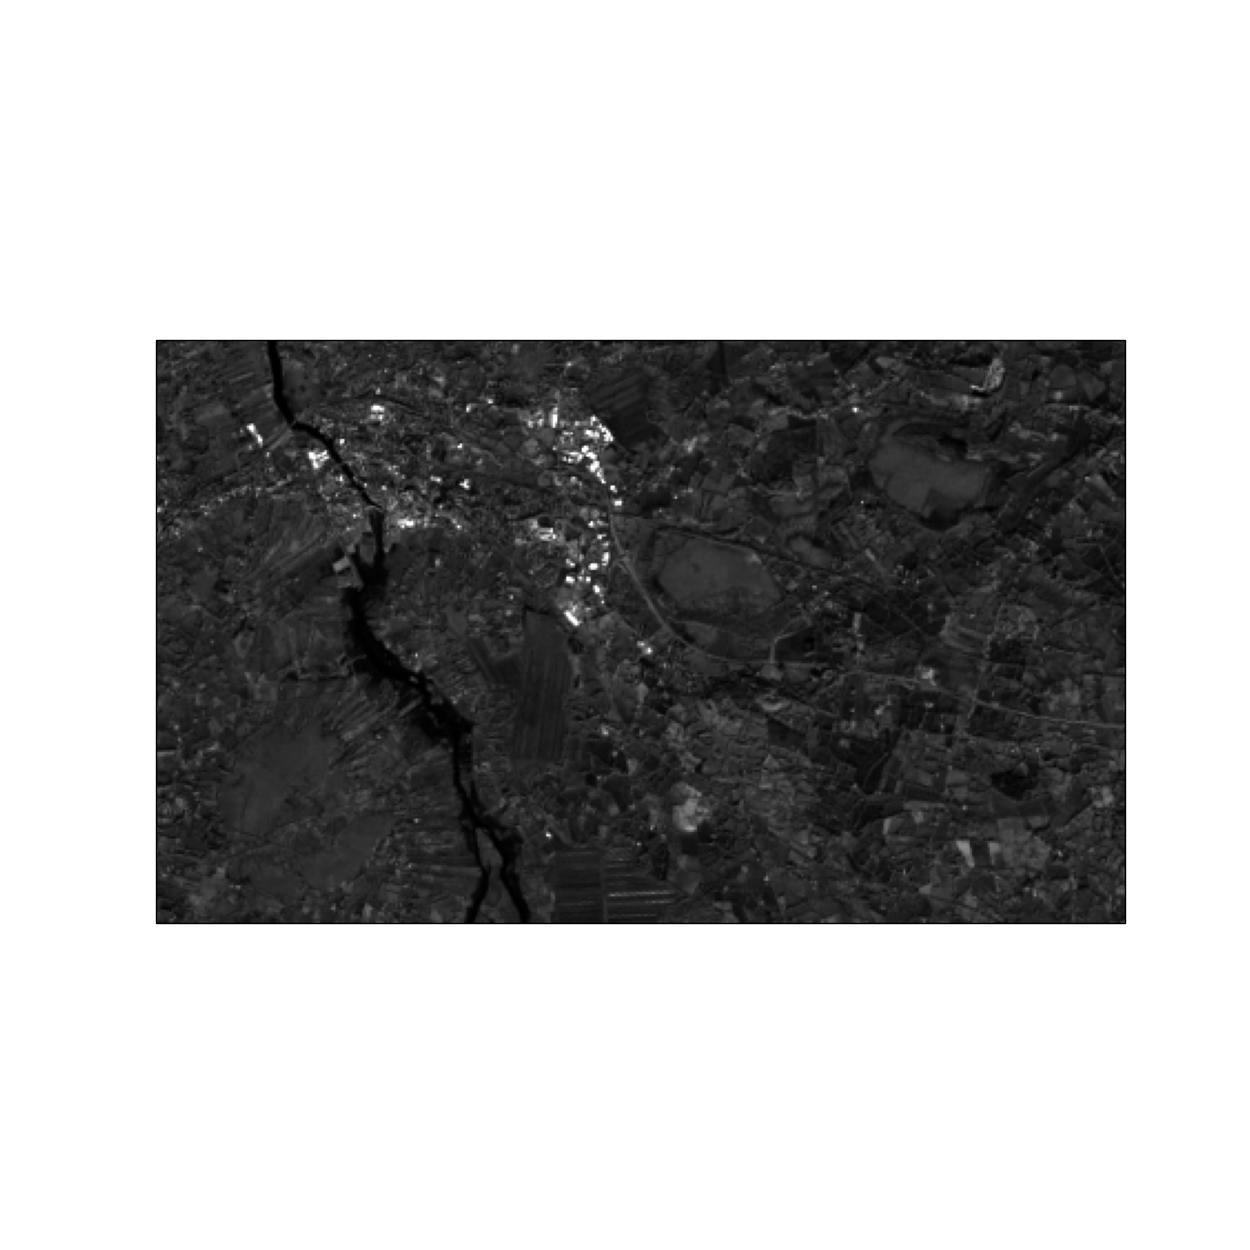

In [133]:
h, ax = img_display(img, ax, [3, 3, 3], plotCRS, [xmin, xmax, ymin, ymax], pmin=0.1, pmax=99.9)
fig # just to save you from scrolling back up to see

In [136]:
the_ndvi = es.normalized_diff(img[4], img[3])
print(the_ndvi)
max(the_ndvi[1])
min(the_ndvi[1])

[[0.31833285 0.3516113  0.30259849 ... 0.24628057 0.22942822 0.2493824 ]
 [0.30133365 0.34750979 0.2887878  ... 0.22987013 0.20938917 0.2591707 ]
 [0.25549327 0.31066166 0.27910864 ... 0.18177343 0.20426167 0.23512309]
 ...
 [0.17624309 0.24398625 0.2600312  ... 0.18294225 0.14178263 0.10157368]
 [0.19457995 0.22562857 0.22055504 ... 0.14901524 0.11003891 0.13074734]
 [0.13187139 0.10695726 0.18094561 ... 0.13561736 0.20282516 0.2499074 ]]


0.0029051853156087685

<IPython.core.display.Javascript object>


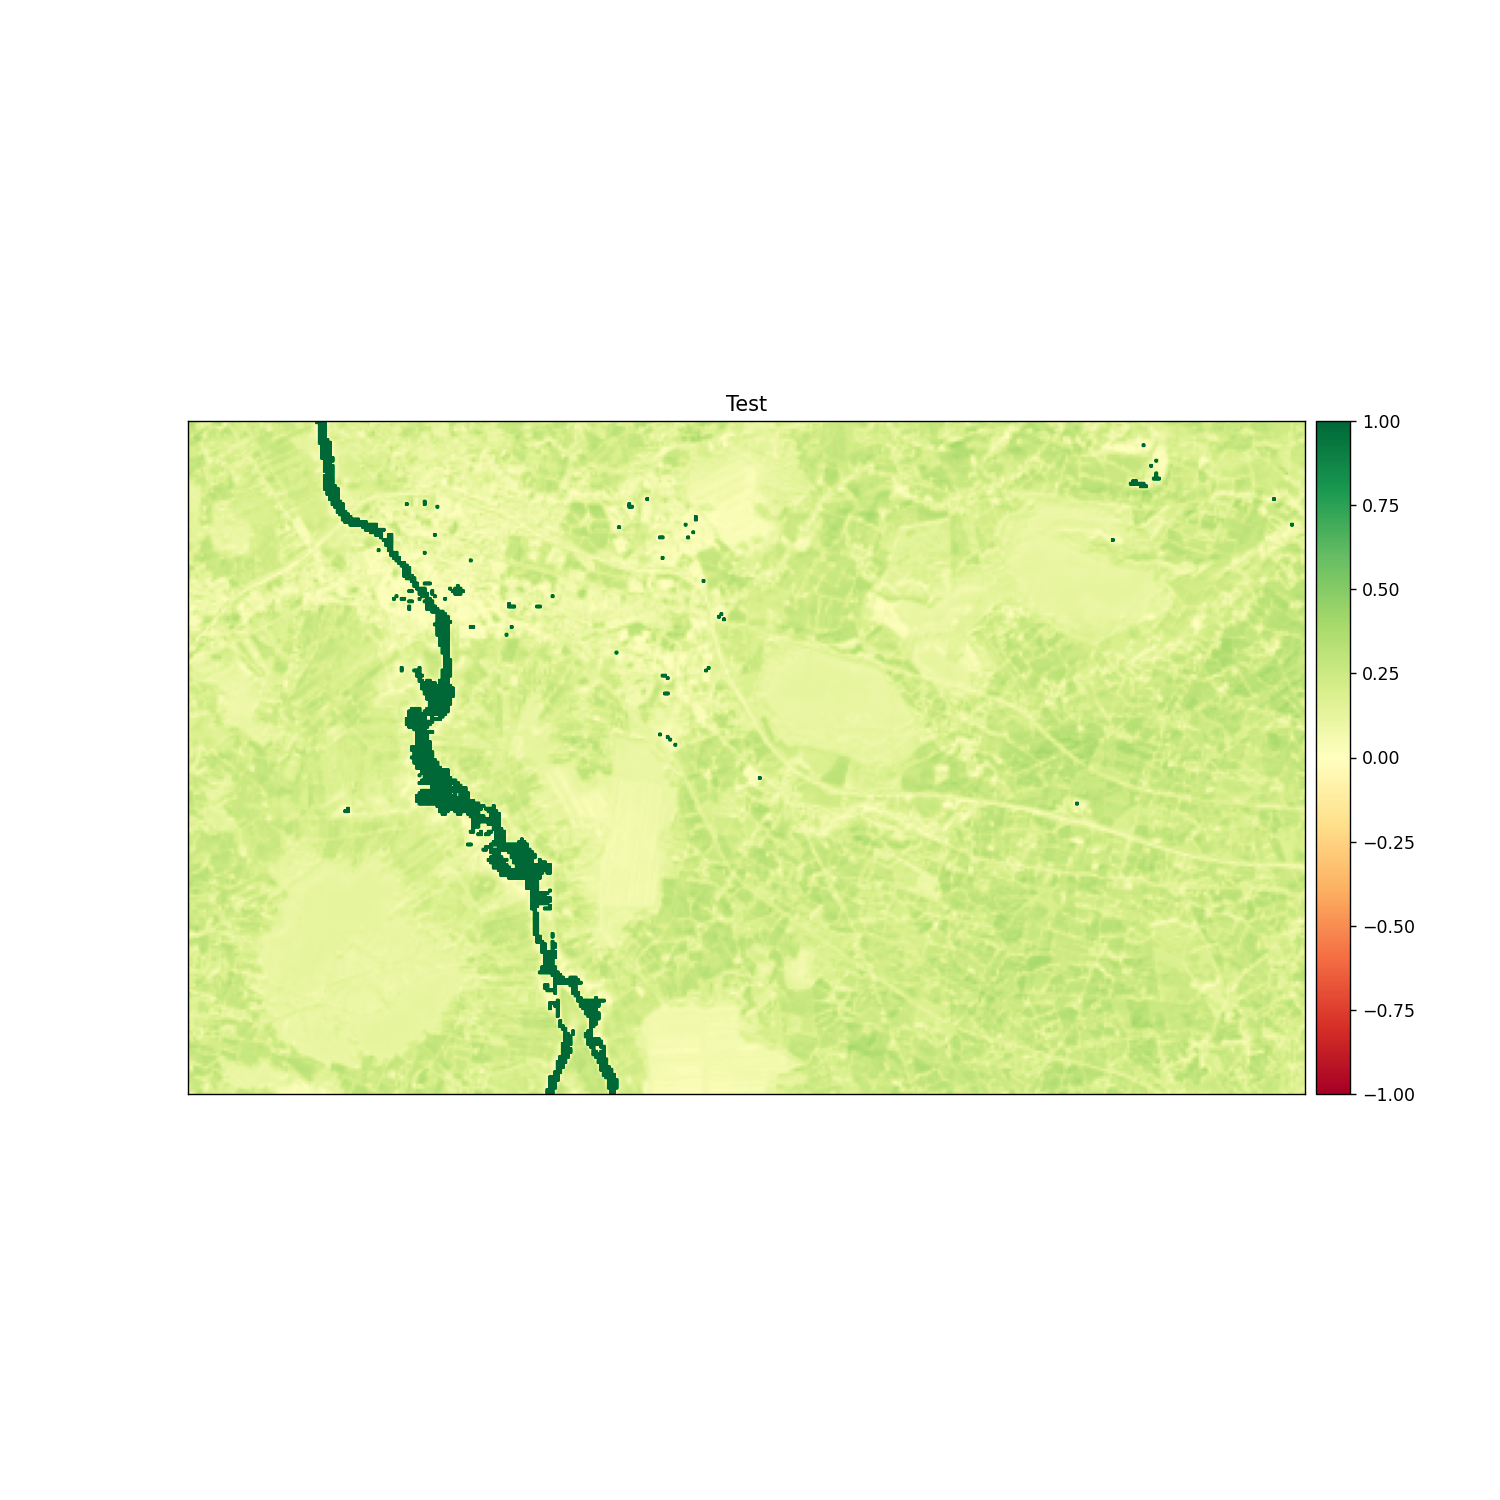

<AxesSubplot:title={'center':'Test'}>

In [138]:
ep.plot_bands(the_ndvi, cmap="RdYlGn", cols=1, vmin = -1, vmax = 1, title="Test")

NameError: name 'a' is not defined

0.005665915762168066

0.004583112991362595

TypeError: unsupported operand type(s) for -: 'DatasetReader' and 'DatasetReader'

Help on module landsatxplore.api in landsatxplore:

NAME
    landsatxplore.api - Python implementation of the Earth Explorer API.

CLASSES
    builtins.dict(builtins.object)
        AcquisitionFilter
        CloudCoverFilter
        Coordinate
        GeoJson
        MetadataValue
        SceneFilter
        SpatialFilterGeoJSON
        SpatialFilterMbr
    builtins.object
        API
    
    class API(builtins.object)
     |  API(username, password)
     |  
     |  EarthExplorer API.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, username, password)
     |      EarthExplorer API.
     |      
     |      Parameters
     |      ----------
     |      username : str
     |          USGS EarthExplorer username.
     |      password : str
     |          USGS EarthExplorer password.
     |  
     |  get_display_id(self, entity_id, dataset)
     |      Get display ID from entity ID.
     |      
     |      Parameters
     |      ----------
     |      entity_id :

AttributeError: module 'landsatxplore.api' has no attribute 'search'

NameError: name 'landsatxplore' is not defined

<module 'landsatxplore' from 'C:\\Users\\IconI\\.conda\\envs\\assignment_env\\lib\\site-packages\\landsatxplore\\__init__.py'>

In [81]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


In [139]:
os.chdir(os.path.join(et.io.HOME, "Documents\GitHub\Assignment_EGM722"))

In [140]:
data = et.data.get_data("vignette-elevation")

In [141]:
landsat_path = glob("Image\LC08_L1TP_207023_20211122_20211130_01_T1_B*.tif")

In [142]:
landsat_path.sort()

In [146]:
arr_st, meta = es.stack(landsat_path, nodata=-9999)
red = arr_st[3].astype(float)
nir = arr_st[4].astype(float)

In [152]:
ndvi_2 = np.divide((nir-red), (nir+red))


C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


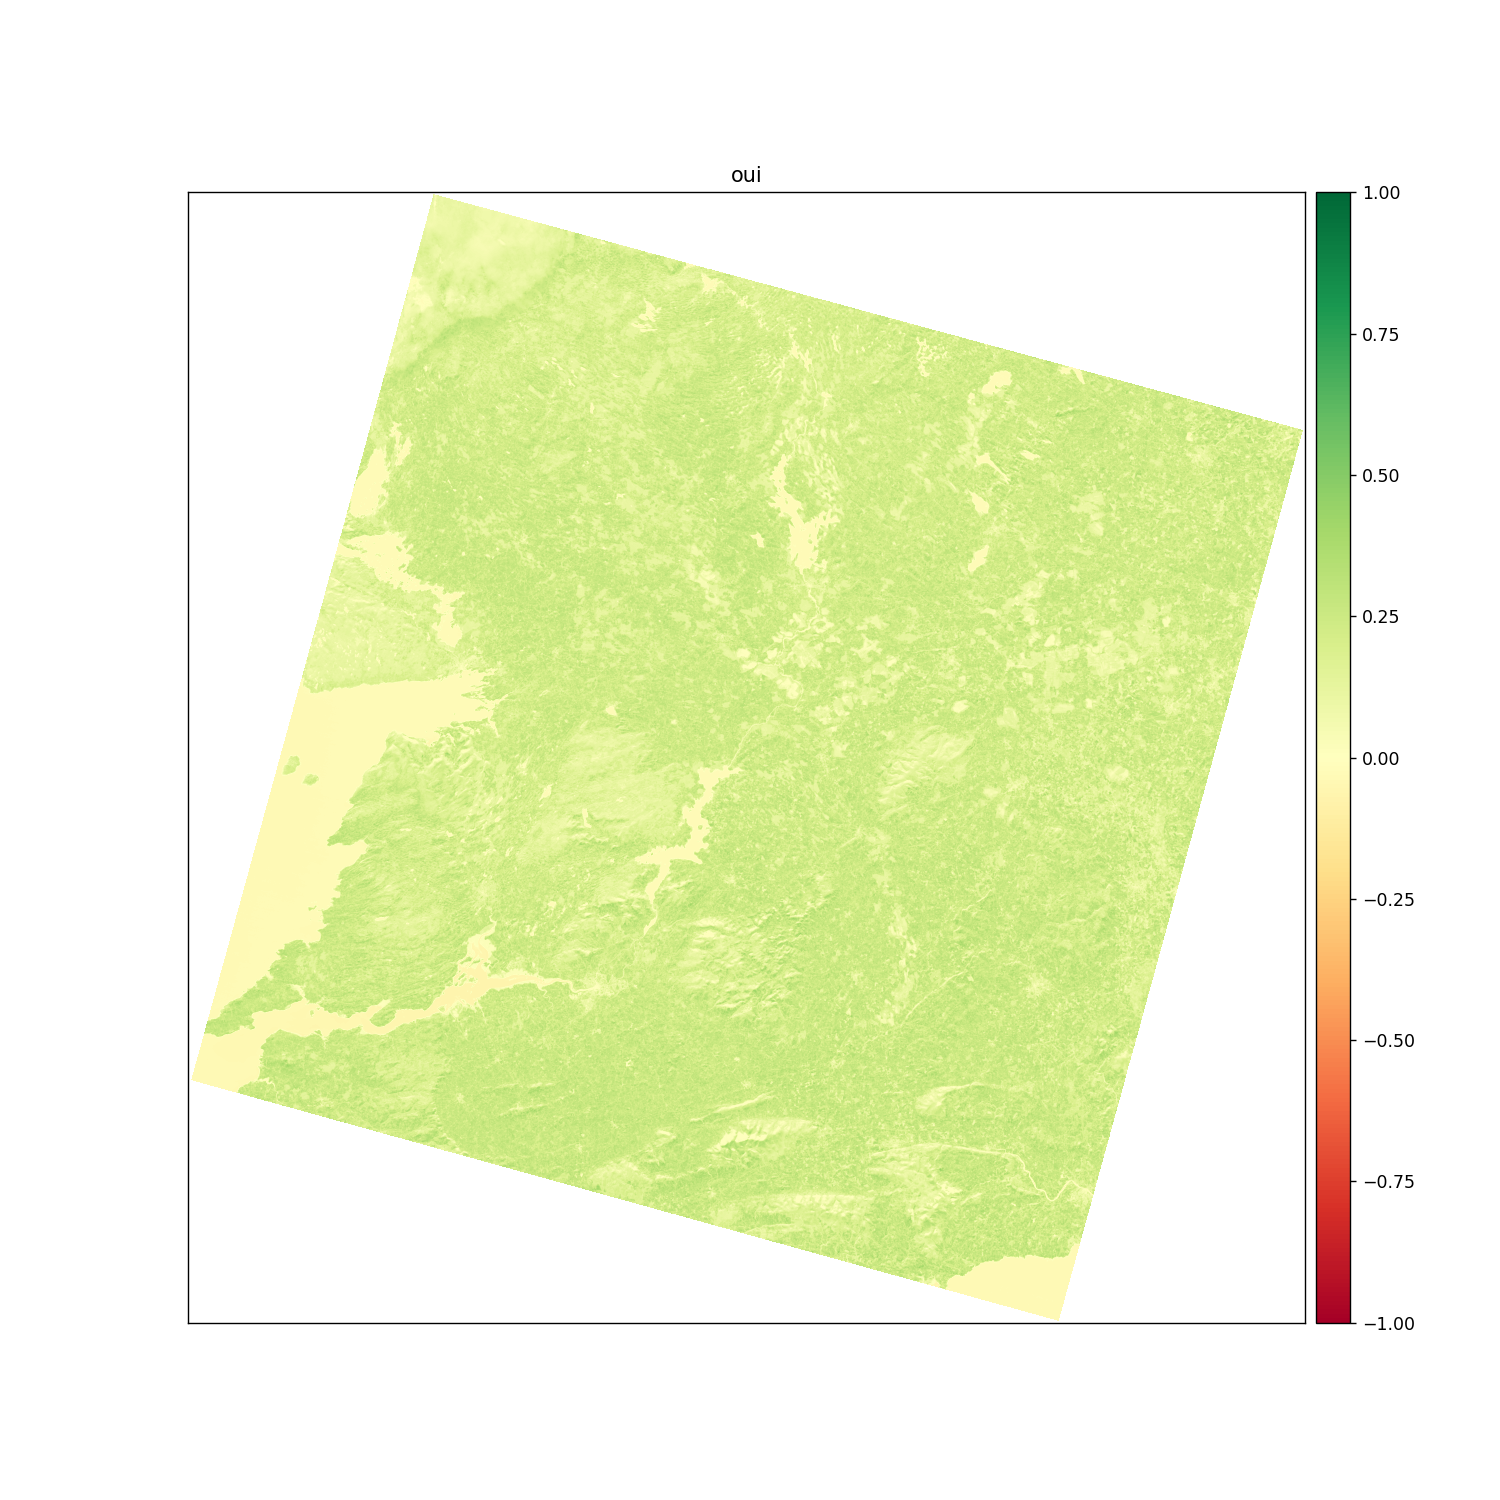

<AxesSubplot:title={'center':'oui'}>

In [153]:
ep.plot_bands(ndvi_2, cmap="RdYlGn", cols=1, title="oui", vmin=-1, vmax=1)


In [155]:
max(ndvi_2[1])

masked

<IPython.core.display.Javascript object>


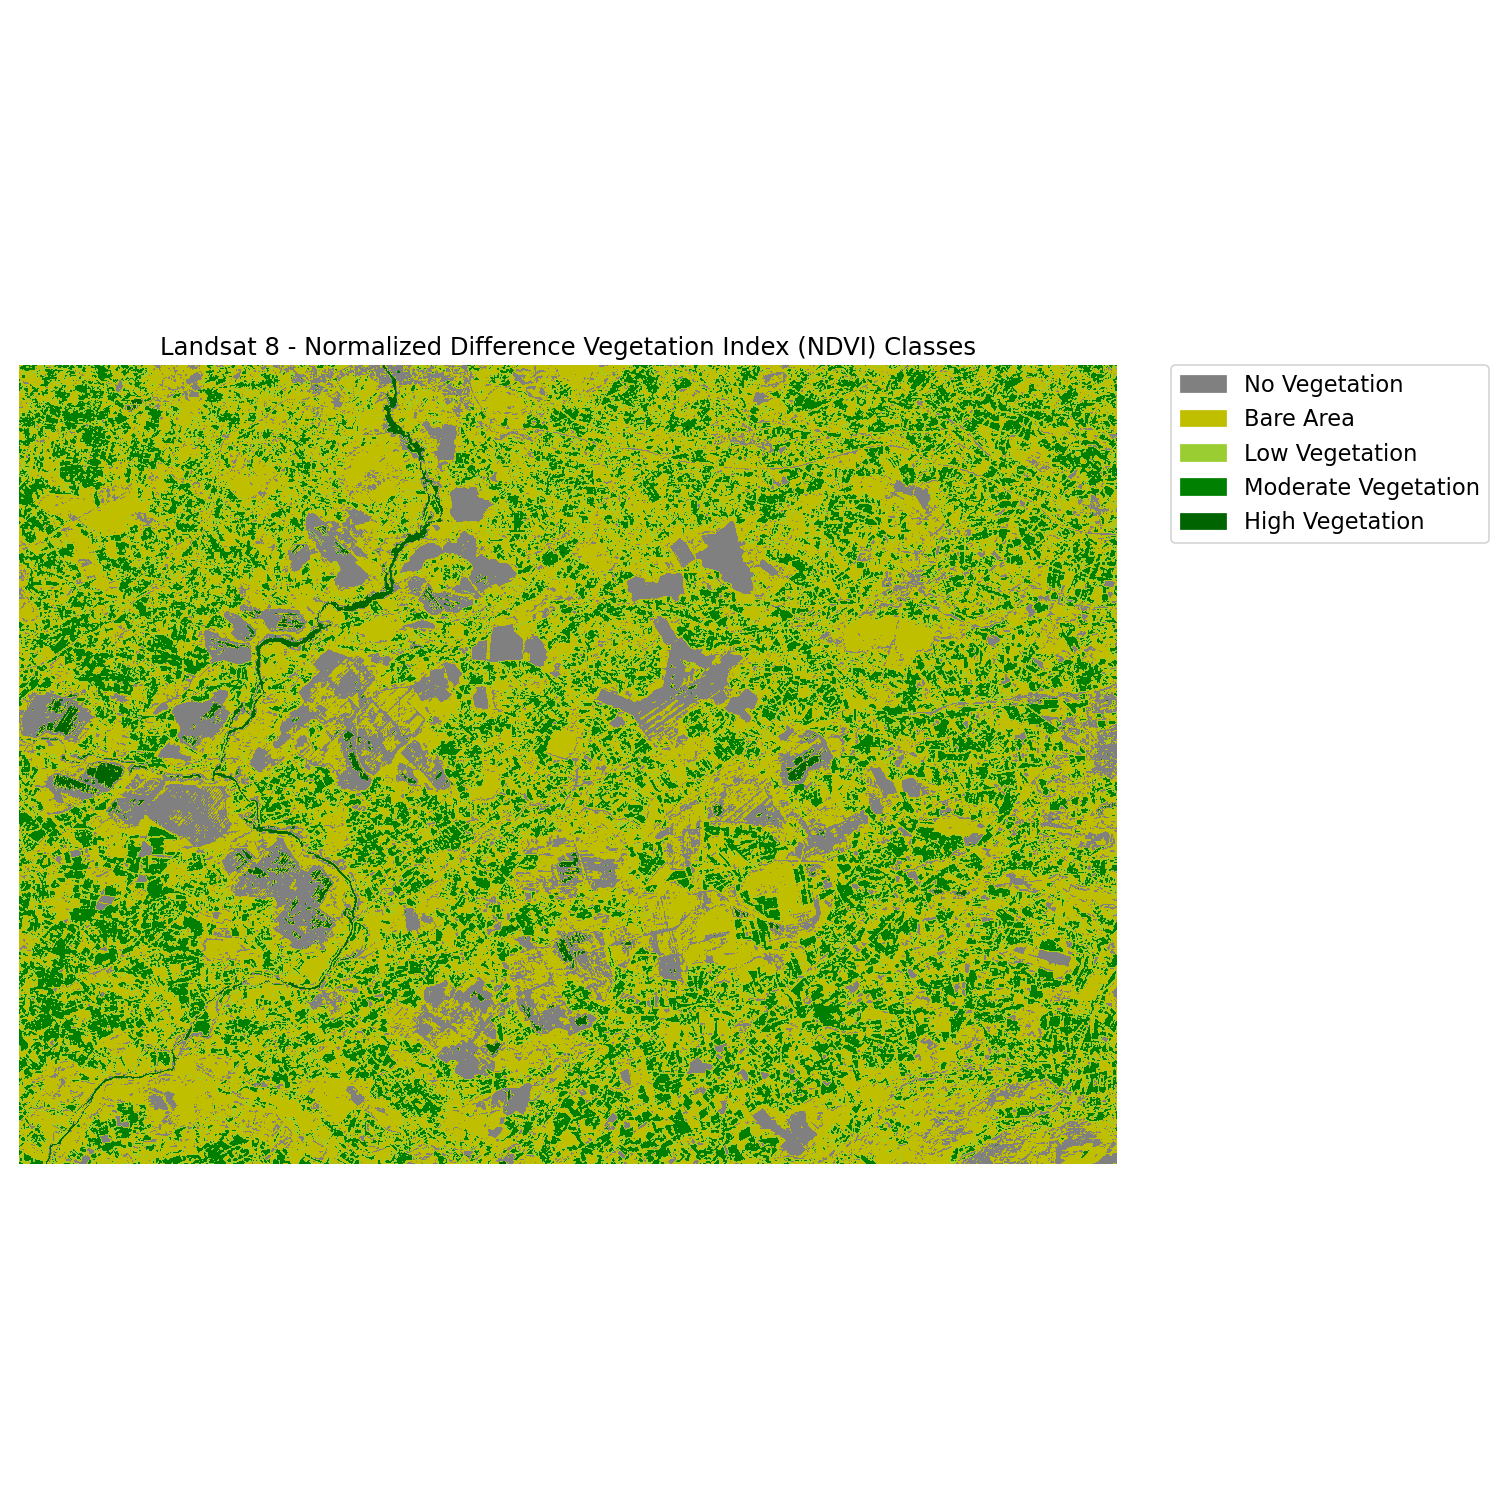

masked

<IPython.core.display.Javascript object>


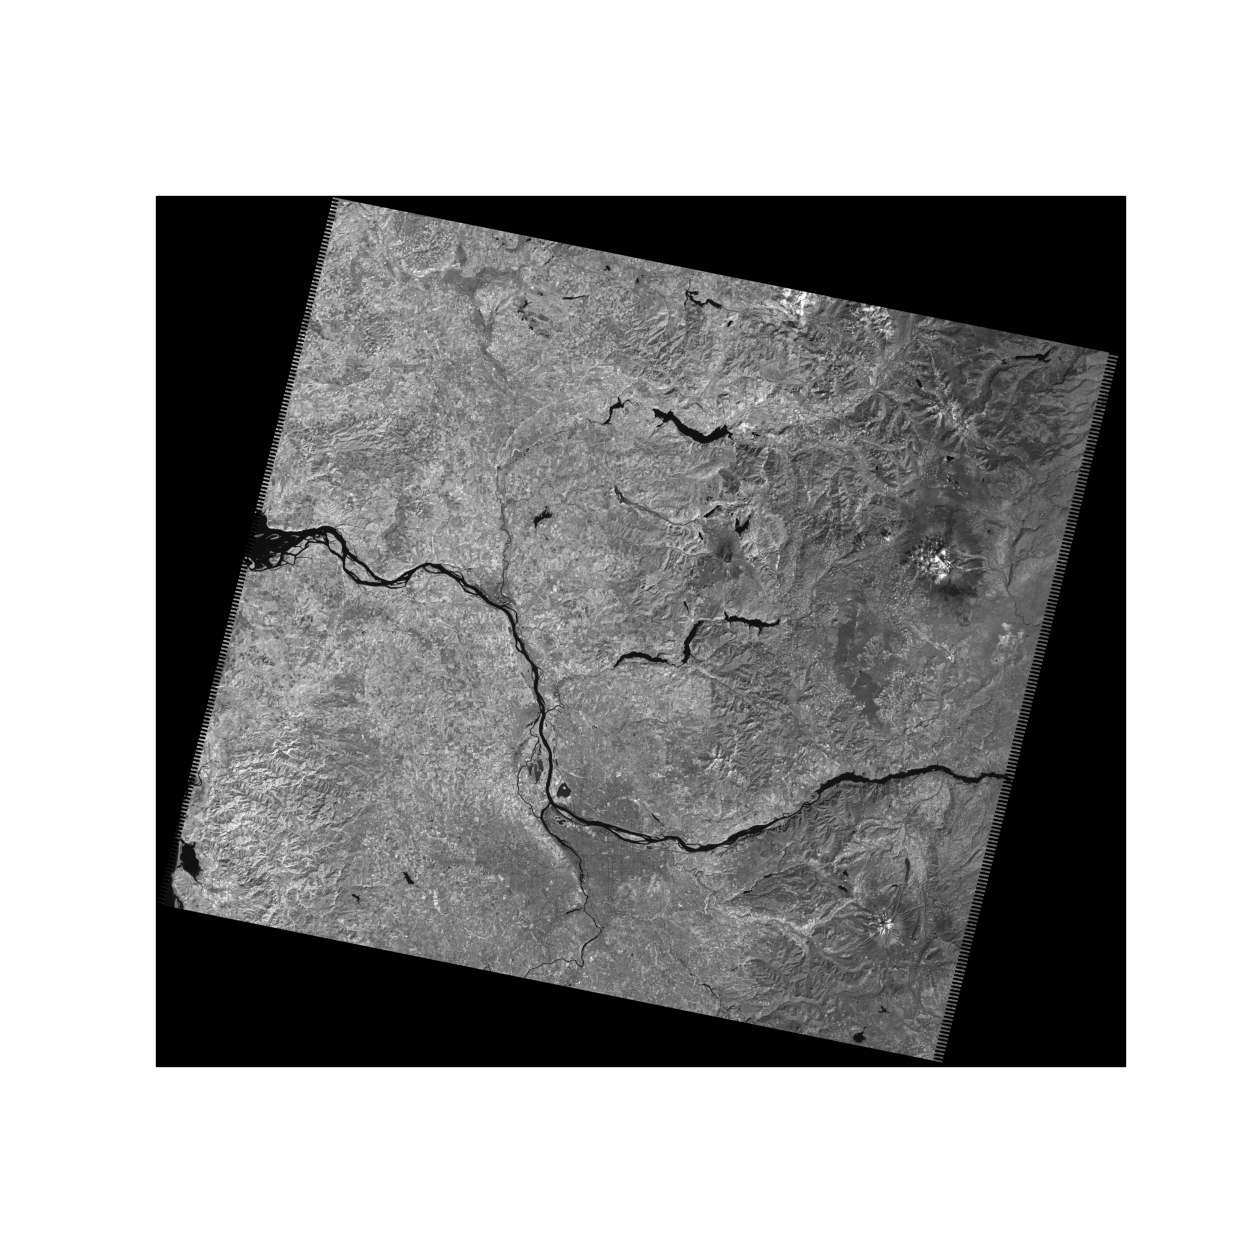

<IPython.core.display.Javascript object>


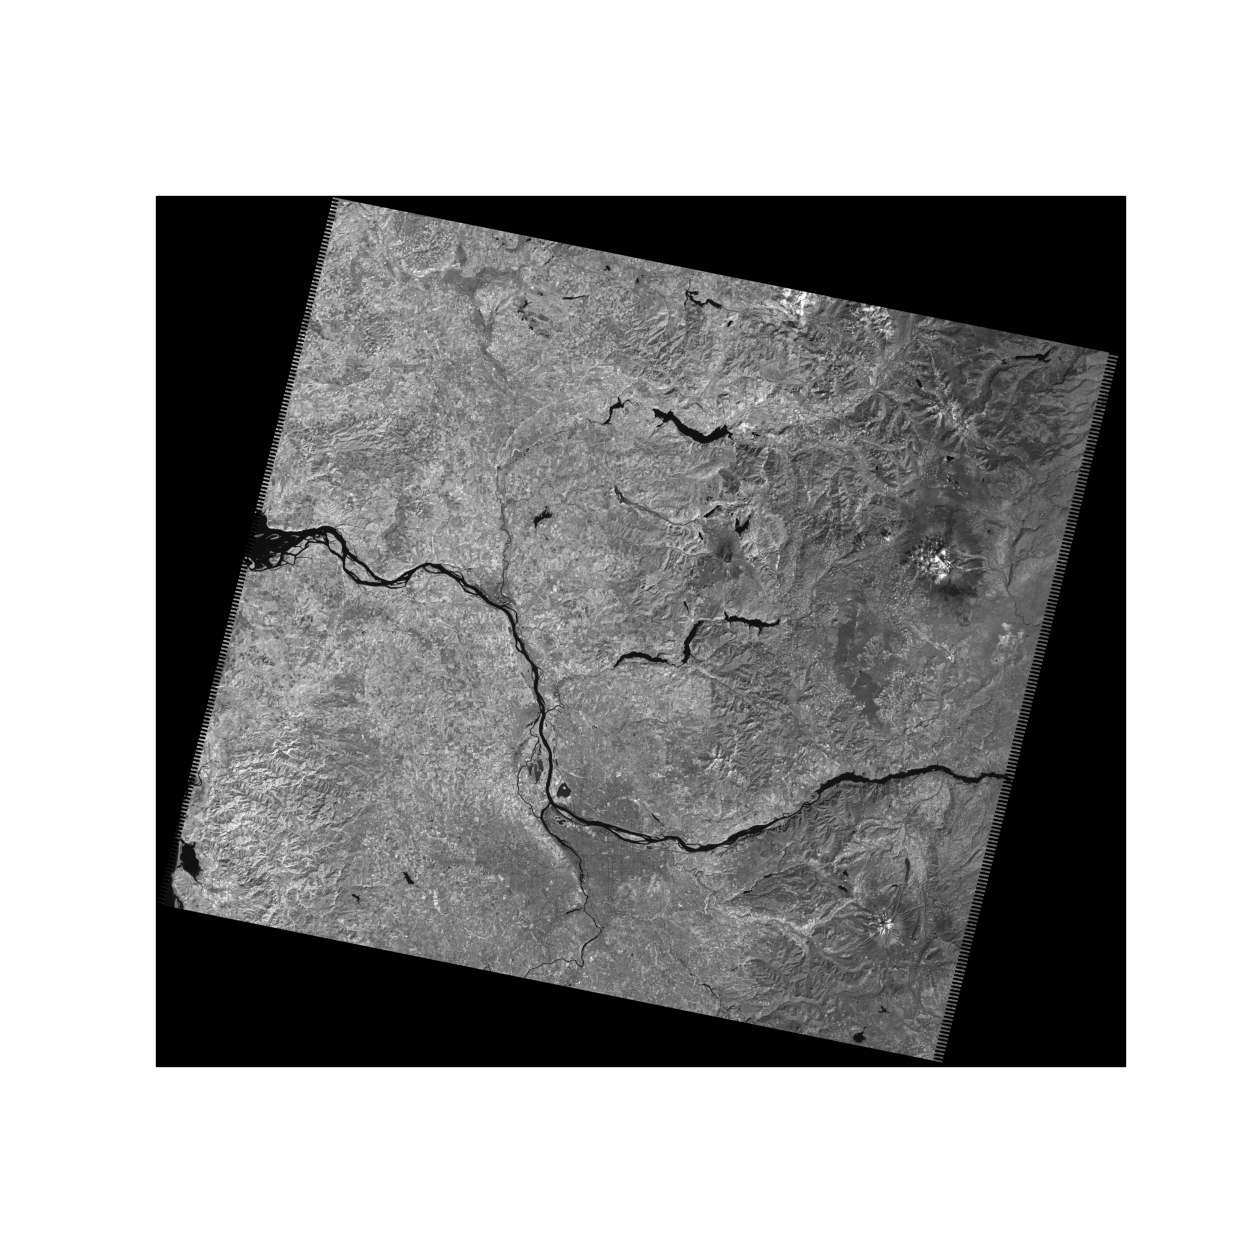

masked